# Hierarchical Clustering

## I have no Idea What is Hierarchical Clustering. Let's dive into it

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs



In [2]:
X,Y = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

## Plotting the raw data

[[-0.27038551  0.1154703 ]
 [-0.47380312  0.43417394]
 [ 4.34165566  3.64357979]
 [-1.92956865 -0.24631728]
 [ 8.58540465  3.86691118]]
<class 'numpy.ndarray'>


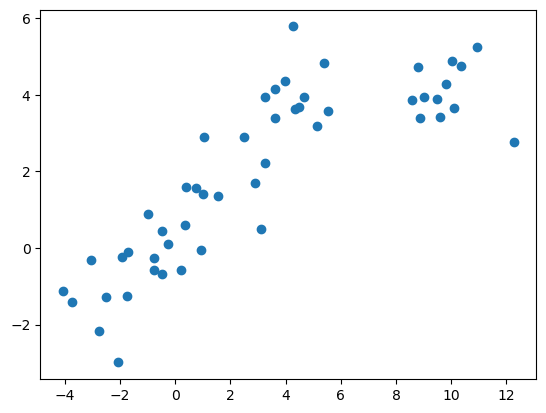

In [15]:
print(X[:5])
print(type(X))
plt.scatter(X[:,0], X[:,1])

## Building the weapon

In [16]:
agg = AgglomerativeClustering(n_clusters=4,linkage='average')

## Learning

In [17]:
agg.fit(X)


AgglomerativeClustering(linkage='average', n_clusters=4)

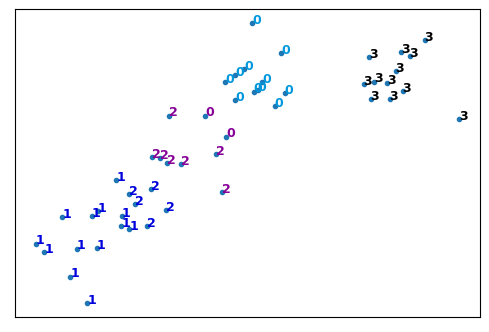

In [23]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X1.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(Y[i]),
             color=plt.cm.nipy_spectral(agg.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()

In [26]:
from scipy.spatial import distance_matrix

dis_ma = distance_matrix(X,X)


C:\Users\R\AppData\Local\Temp\ipykernel_14000\1532620501.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dis_ma, 'complete')


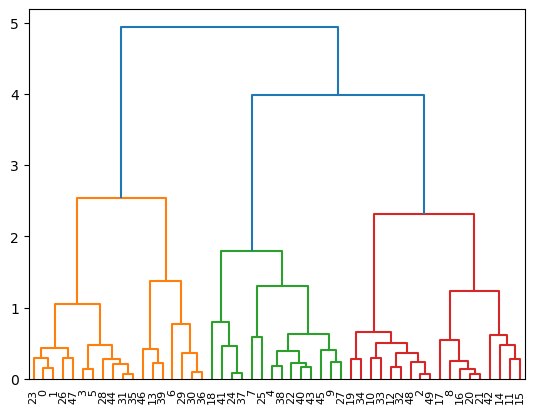

In [29]:
Z = hierarchy.linkage(dis_ma, 'complete')
dendro = hierarchy.dendrogram(Z)